In [ ]:
import torch
from torch import nn

In [3]:
def comp_conv2d(conv2d, X):
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:])

conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [4]:
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [5]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [6]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

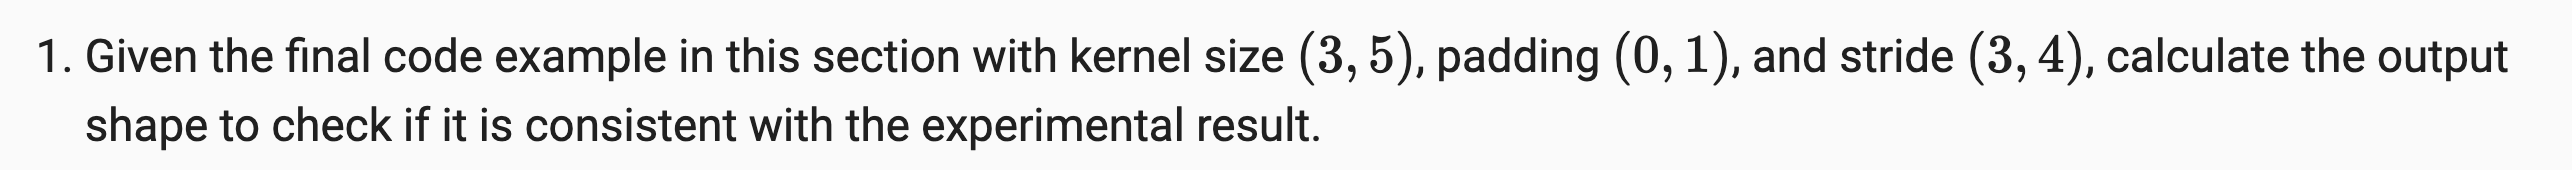

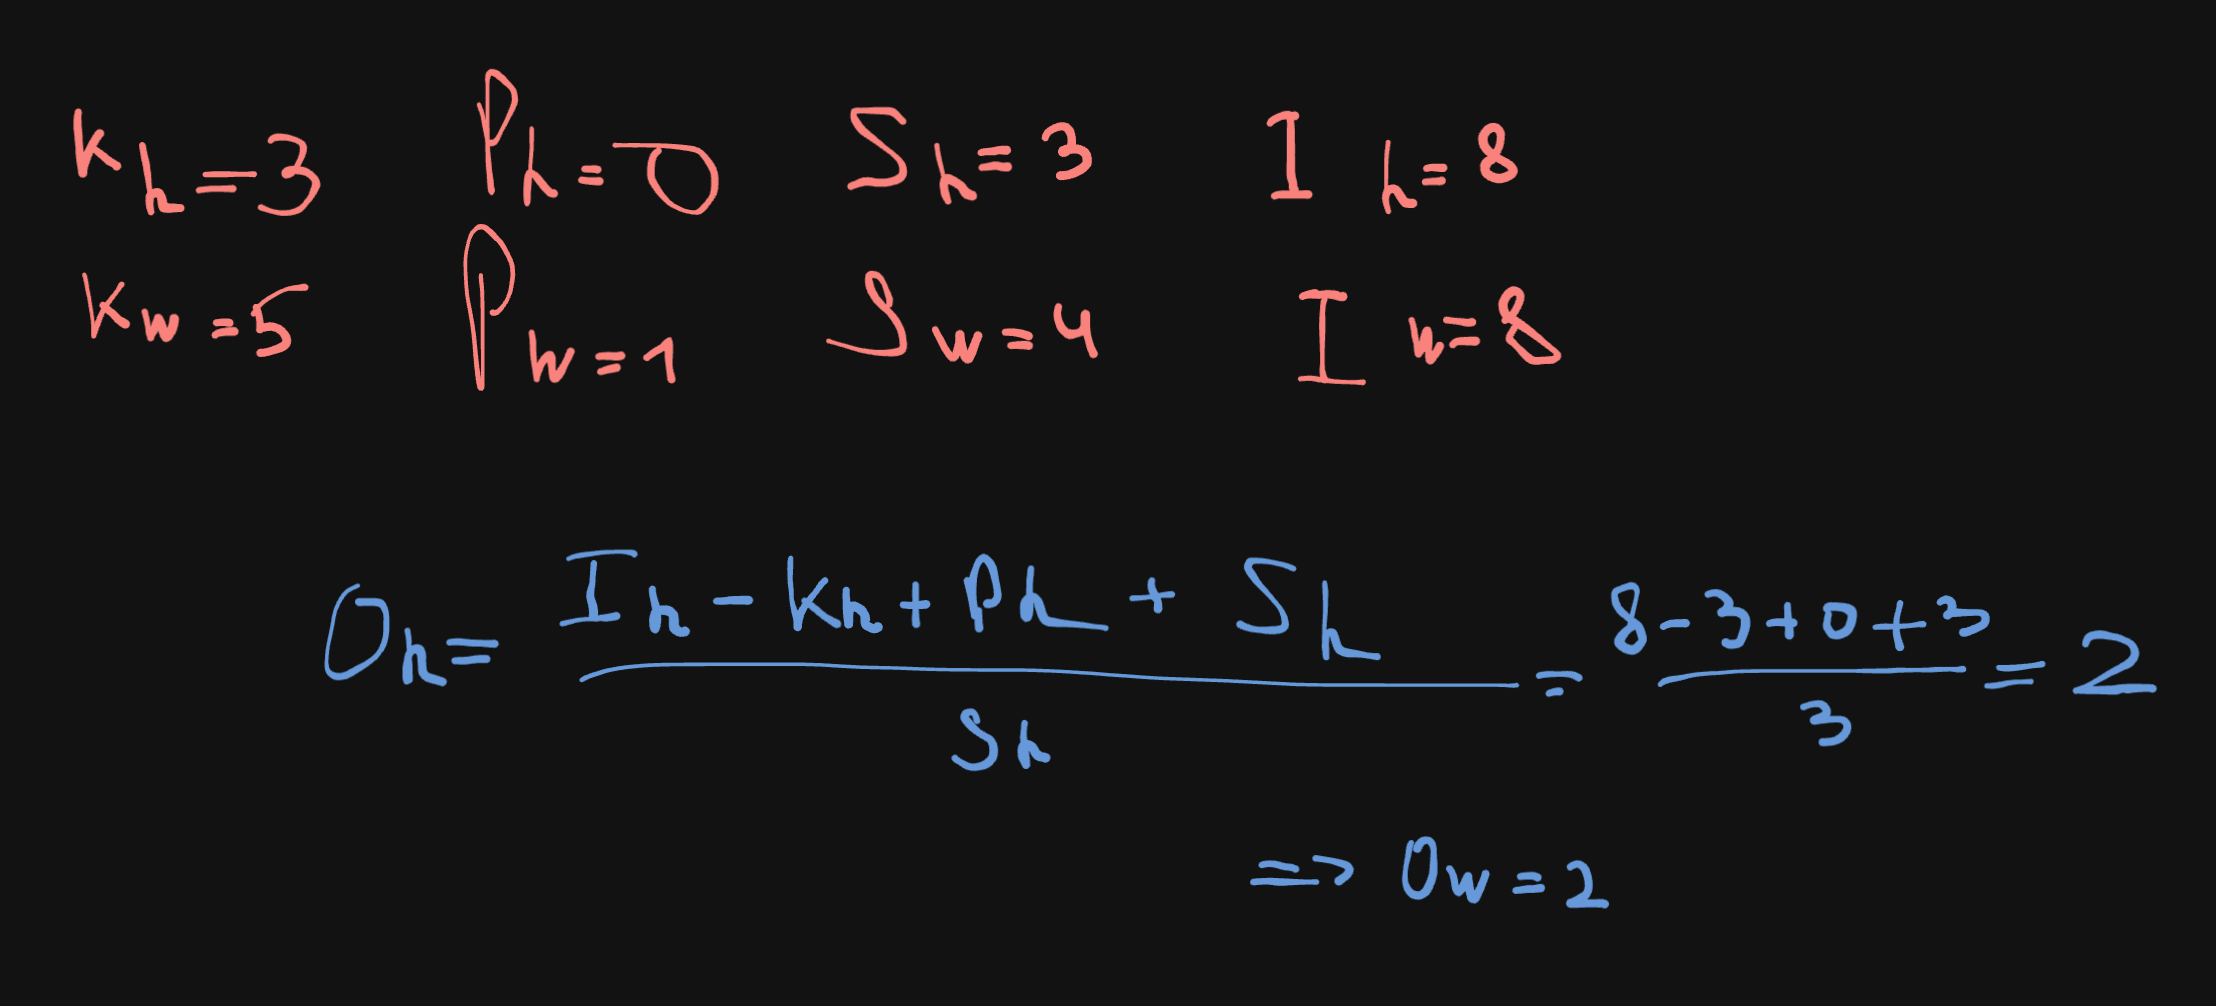

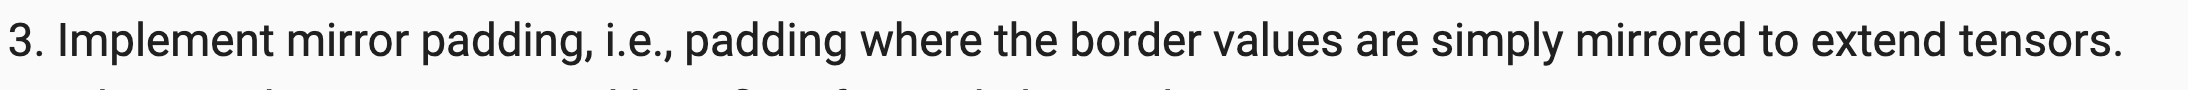

In [8]:
x = torch.randn((2, 2))
x

tensor([[ 0.0457,  0.2342],
        [-0.3036,  0.8354]])

In [15]:
padded_x = nn.functional.pad(x.reshape((1, 1) + x.shape), pad=(1, 1, 1, 1), mode="reflect")
padded_x

tensor([[[[ 0.8354, -0.3036,  0.8354, -0.3036],
          [ 0.2342,  0.0457,  0.2342,  0.0457],
          [ 0.8354, -0.3036,  0.8354, -0.3036],
          [ 0.2342,  0.0457,  0.2342,  0.0457]]]])

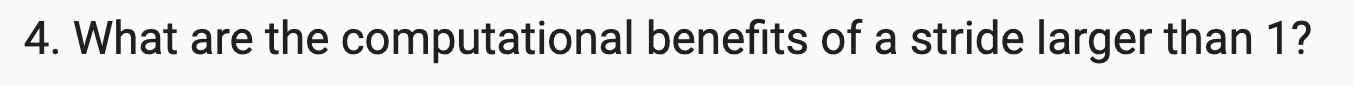

The primary computational benefit of a stride ($S$) larger than 1 is a significant reduction in the total number of operations (FLOPs) and memory usage, roughly by a factor of $S^2$ for 2D data.

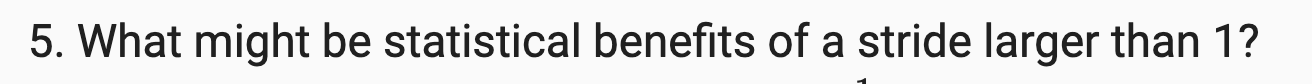

1. Exponential Increase of the Receptive Field

By using a stride , you are essentially condensing spatial information. Each subsequent layer's neurons "see" a much larger patch of the original input image than they would if you moved pixel-by-pixel.

* **Without Stride/Pooling:** The receptive field grows linearly (slowly). You would need an incredibly deep and computationally expensive network to "see" a whole face or a whole car.
* **With Stride:** The receptive field grows **exponentially**. This allows the network to capture high-level global structures (like the layout of organs in a medical scan) in just a few layers.

2. Reducing Spatial Redundancy

In most images, neighboring pixels are highly correlated—they contain almost the same information.

* By "ignoring" or skipping overlapping steps, the network focuses on extracting **unique features** rather than processing the same local texture multiple times.
* This acts as a form of **regularization**, forcing the network to learn more robust, compressed representations of the data.

3. Translation Invariance (to a degree)

Strided operations help the network become less sensitive to the exact pixel-perfect location of a feature. If a feature shifts slightly, the downsampled representation in deeper layers remains relatively stable, which helps with generalizability.